In [291]:
#Importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import shap
import streamlit as st



In [210]:
df = pd.read_csv("loan.csv")#Téléchargement de notre dataset
df.head(10)#affichage de 10 premières lignes

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
5,24,Female,Nurse,Associate's,Single,48000,640,Denied
6,42,Male,Lawyer,Doctoral,Married,120000,790,Approved
7,29,Female,Artist,Bachelor's,Single,38000,620,Denied
8,37,Male,IT,Master's,Married,92000,750,Approved
9,48,Female,Doctor,Doctoral,Married,180000,820,Approved


In [211]:
#On remarque et on distingue notre variable cible "Loan_status"

In [212]:
df.info()# AFfichage des informations générales sur nos variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [213]:
df.isna().sum()#pas de valeur manquante pour nos variable

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [214]:
#affichage de valeurs unique de nos variables 
df["age"].unique()

array([32, 45, 28, 51, 36, 24, 42, 29, 37, 48, 55, 31, 26, 39, 44, 27, 34,
       41, 30, 53, 38, 25, 46, 33, 40, 35, 43, 49, 54, 47, 52, 50],
      dtype=int64)

In [215]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [216]:
df["occupation"].unique ()

array(['Engineer', 'Teacher', 'Student', 'Manager', 'Accountant', 'Nurse',
       'Lawyer', 'Artist', 'IT', 'Doctor', 'Consultant', 'Analyst',
       'Salesman', 'Marketing', 'Architect', 'Designer', 'Pharmacist',
       'Researcher', 'Professor', 'Pilot', 'Receptionist', 'Banker',
       'Writer', 'Chef', 'Veterinarian', 'Sales', 'HR', 'Electrician',
       'Realtor', 'Photographer', 'Editor', 'Programmer', 'Dentist',
       'Musician', 'Psychologist', 'Server', 'Software', 'Stylist'],
      dtype=object)

In [217]:
df["education_level"].unique()

array(["Bachelor's", "Master's", 'High School', "Associate's", 'Doctoral'],
      dtype=object)

In [218]:
df["marital_status"].unique()
   

array(['Married', 'Single'], dtype=object)

In [219]:
df["credit_score"].unique()

array([720, 680, 590, 780, 710, 640, 790, 620, 750, 820, 770, 690, 610,
       730, 760, 650, 740, 800, 700, 580, 630, 670, 600, 810, 570, 560,
       660, 830], dtype=int64)

In [220]:
df["income"].unique()

array([ 85000,  62000,  25000, 105000,  75000,  48000, 120000,  38000,
        92000, 180000, 110000,  68000,  42000,  78000,  95000,  52000,
        88000, 125000,  72000,  98000,  80000,  35000, 115000,  45000,
        60000,  70000,  90000,  55000,  65000,  40000, 140000,  30000,
       100000,  28000,  82000,  58000,  50000, 130000, 175000,  32000],
      dtype=int64)

In [221]:
df["loan_status"].unique()

array(['Approved', 'Denied'], dtype=object)

Notre jeu de donnée est propre sans valeur manquante et bien structuré. Il nous reste que à réaliser de l'encodage pour nos variable object pour les rendre numérique.

<Figure size 1000x1000 with 0 Axes>

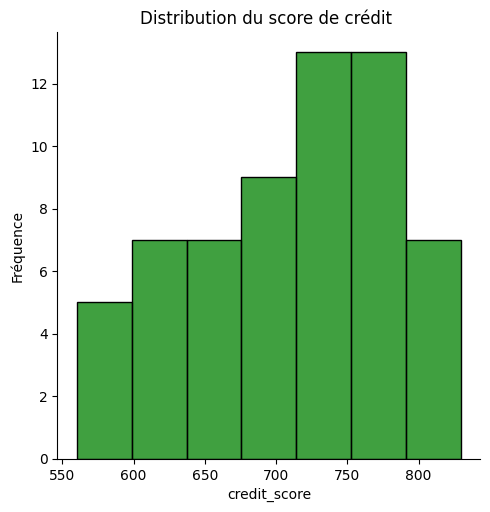

In [222]:
plt.figure(figsize= (10,10))
sns.displot(df["credit_score"], color = "g", )
plt.title("Distribution du score de crédit ", color = "k");
plt.xlabel("credit_score")
plt.ylabel("Fréquence")
plt.show()

C:\Users\yacin\AppData\Local\Temp\ipykernel_22224\3935544577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= "loan_status", palette= "viridis", legend= False);


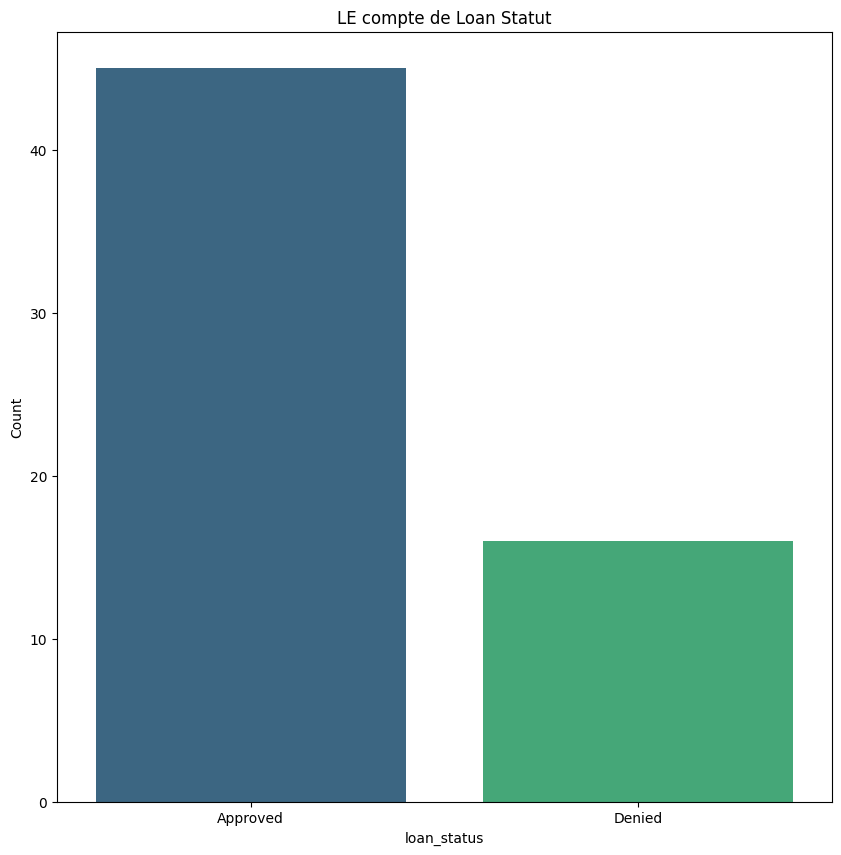

In [223]:
plt.figure(figsize= (10,10))
plt.title("LE compte de Loan Statut")
sns.countplot(data = df, x= "loan_status", palette= "viridis", legend= False);
plt.xlabel("loan_status")
plt.ylabel("Count")
plt.show()

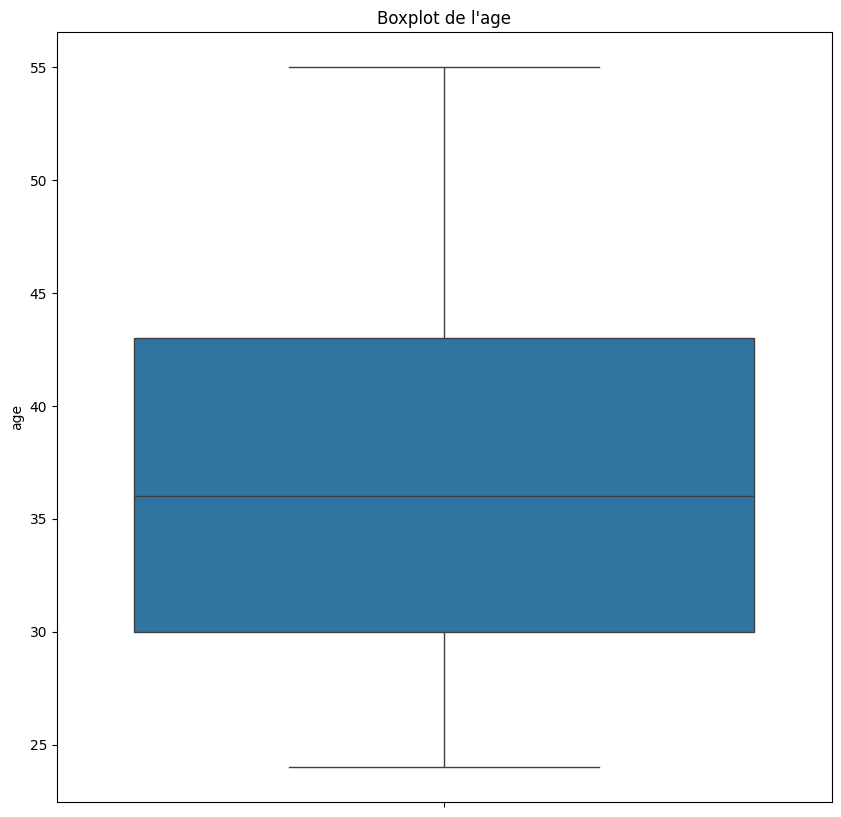

In [224]:
plt.figure(figsize= (10,10))
plt.title ("Boxplot de l'age")
sns.boxplot(df["age"]);

C:\Users\yacin\AppData\Local\Temp\ipykernel_22224\3596832582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='income', palette="viridis")


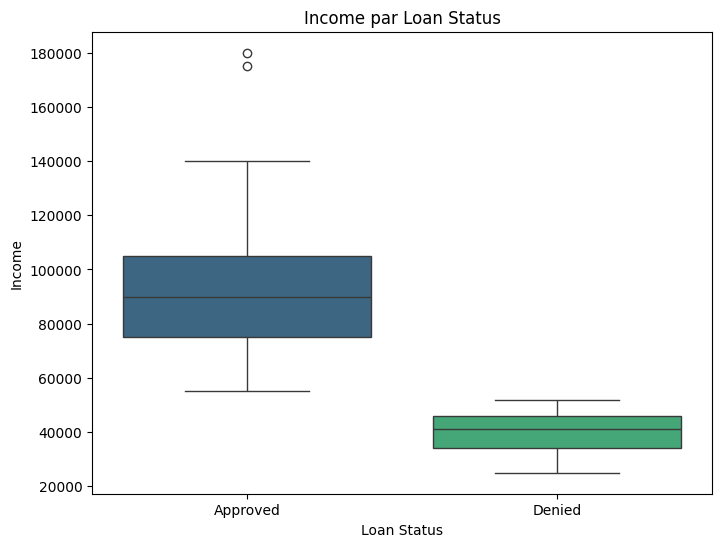

In [225]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='income', palette="viridis")
plt.title('Income par Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.show()

Text(0.5, 1.0, 'Attribusion du crédit selon le genre')

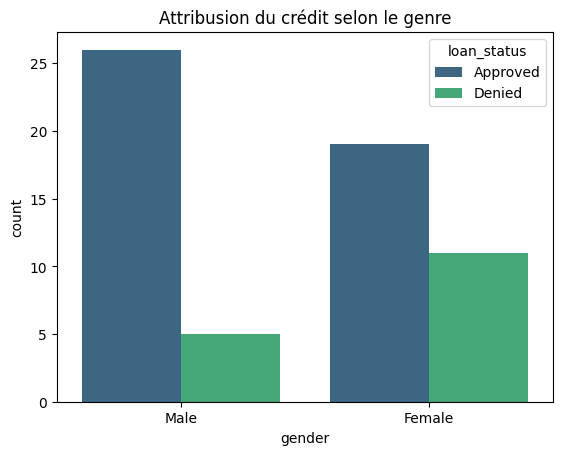

In [226]:
sns.countplot(data= df, x= "gender", hue= "loan_status", palette= "viridis" );
plt.title ("Attribusion du crédit selon le genre")

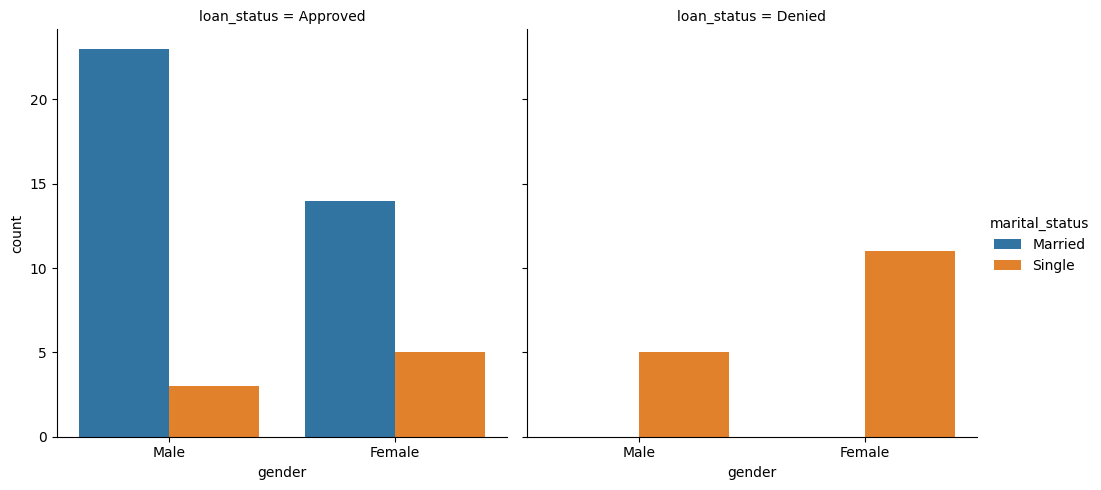

In [227]:

sns.catplot(data=df, x="gender", hue="marital_status", col="loan_status", kind="count")



Text(0.5, 1.0, 'Crédit accordé selon le genre Gender')

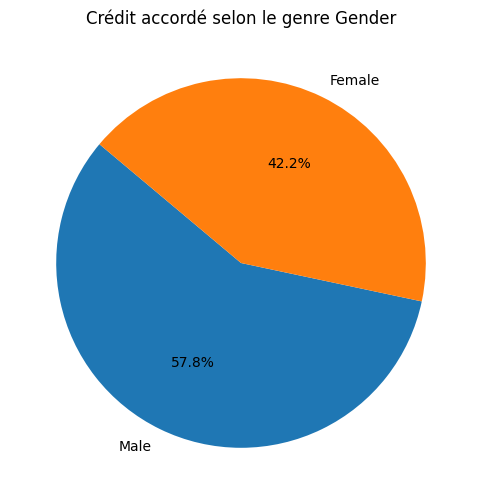

In [242]:
# Filtrer les prêts approuvés
approved_loans = df[df['loan_status'] == 'Approved']

# Calculer les pourcentages par catégorie
loan_counts_gender = approved_loans['gender'].value_counts()

# Créer le graphique en secteurs pour gender
plt.figure(figsize=(12, 6))

plt.pie(loan_counts_gender, labels=loan_counts_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Crédit accordé selon le genre Gender')



Text(0.5, 1.0, 'Crédit accordé selon le genre Gender')

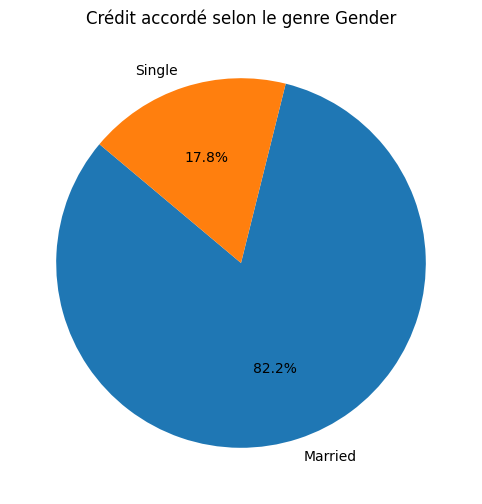

In [243]:
# Filtrer les prêts approuvés
approved_loans = df[df['loan_status'] == 'Approved']

# Calculer les pourcentages par catégorie
loan_counts_gender = approved_loans['marital_status'].value_counts()


# Créer le graphique en secteurs pour gender
plt.figure(figsize=(12, 6))

plt.pie(loan_counts_gender, labels=loan_counts_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('crédit accordé pour les cituation familliale')

### encodage des variable catégorielles 

In [255]:
# Remplacez les valeurs 'Male' par 1 et 'Female' par 0 dans la colonne 'gender'
df['gender'].replace({'Male': 1, 'Female': 0}, inplace= True)


In [278]:
# Remplacez les valeurs 'Married' par 1 et 'Single' par 0 dans la colonne 'marital_status'
df['marital_status'].replace({'Married': 1, 'Single': 0}, inplace= True)


C:\Users\yacin\AppData\Local\Temp\ipykernel_22224\3012683570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital_status'].replace({'Married': 1, 'Single': 0}, inplace= True)


In [266]:
# Remplacez les valeurs 'Approved' par 1 et 'Denied' par 0 dans la colonne 'loan_status'
df['loan_status'].replace({'Approved': 1, 'Denied': 0}, inplace= True)


In [279]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,1
1,45,0,35,4,1,62000,680,1
2,28,1,33,3,1,25000,590,0
3,51,0,16,1,0,105000,780,1
4,36,1,0,1,0,75000,710,1


In [270]:


# Initialiser les encodeurs
occupation_encoder = LabelEncoder()
education_level_encoder = LabelEncoder()
marital_status_encoder = LabelEncoder()

# Appliquer l'encodage sur chaque colonne
df['occupation'] = occupation_encoder.fit_transform(df['occupation'])
df['education_level'] = education_level_encoder.fit_transform(df['education_level'])
df['marital_status'] = marital_status_encoder.fit_transform(df['marital_status'])
df.head()


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,1
1,45,0,35,4,1,62000,680,1
2,28,1,33,3,1,25000,590,0
3,51,0,16,1,0,105000,780,1
4,36,1,0,1,0,75000,710,1


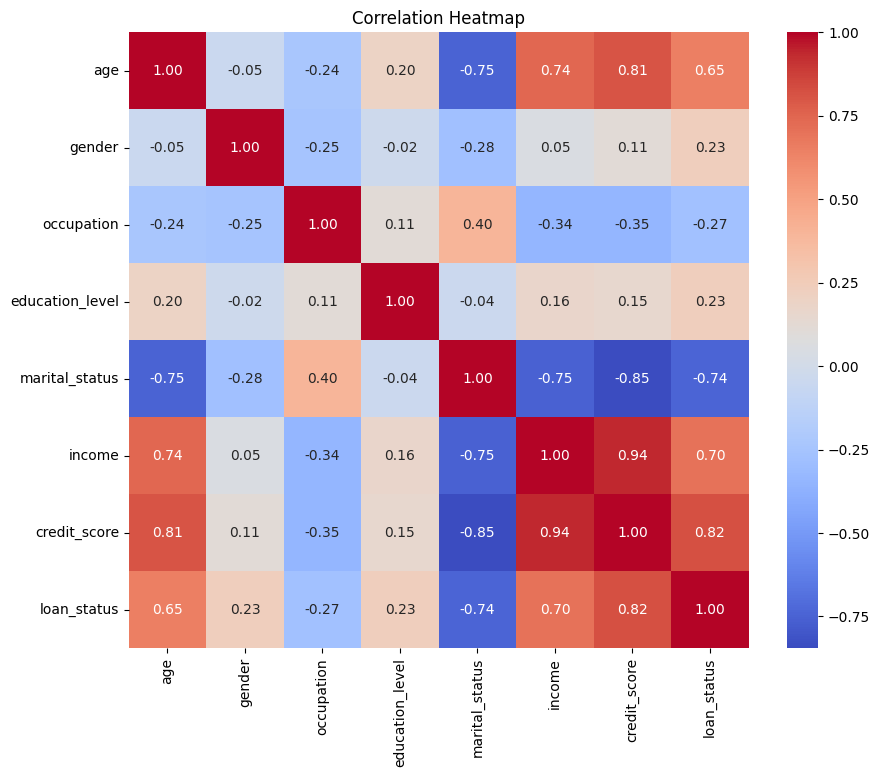

In [282]:
correlation_matrix = df.corr()

# Afficher la heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [284]:
# on sépare notre jeu de données en jeux d'entrainement et en jeu de teste
featurs =df.drop(['loan_status'],axis=1) #on retire notre variable cible
target =df['loan_status']

In [300]:
X_train, x_test, y_train, y_test = train_test_split(featurs,target, test_size= 0.20)
X_train.head()


,age,gender,occupation,education_level,marital_status,income,credit_score
21,25,0,27,3,1,35000,580
39,33,0,34,0,1,42000,620
0,32,1,12,1,0,85000,720
28,31,1,11,3,1,55000,670
8,37,1,14,4,0,92000,750


In [301]:

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [302]:
predicted_val=model.predict(x_test)

In [303]:
predicted_val

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [304]:
accuracy= 100*model.score(x_test,y_test)#calculer l'occuracy
accuracy

100.0

In [307]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, predicted_val)

# Afficher la matrice de confusion
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6 0]
 [0 7]]


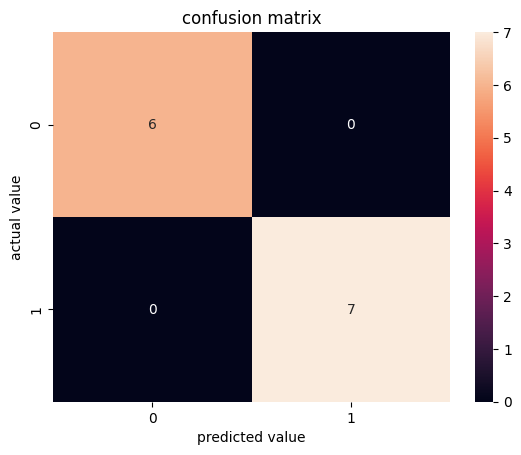

In [308]:
sns.heatmap(array, annot=True)
plt.title('confusion matrix')
plt.ylabel('actual value')
plt.xlabel('predicted value')
plt.show()